### 4번
- 은의 가격 및 이동평균(N=3)의 가격을 하나의 시계열 그래프에 나타내라
- 1월 대비 9월 은 가격이 몇 %올랐는지?

(1) 은의 가격 및 이동평균(N=3)의 가격을 하나의 시계열 그래프에 나타내라

In [19]:
#warinng 무시
import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas as pd
data=pd.DataFrame({"index":[1,2,3,4,5,6,7,8,9], "price":[22.0, 23.4, 21.1, 25.7, 27.4, 30.6, 31.8, 30.2, 41.1]})
data.set_index("index", inplace=True)

- 단순이동평균, MA그래프

단순 이동 평균을 계산하는 이유는 시계열을 좀 더 매끄럽게 하여 변동성이 심해서 트렌드가 눈에 안 보이는 시계열로부터 전체적인 트렌드를 시각적으로 보기 위함

In [21]:
moving_average=data['price'].rolling(window=3).mean() #문제에서 N=3
moving_average

index
1          NaN
2          NaN
3    22.166667
4    23.400000
5    24.733333
6    27.900000
7    29.933333
8    30.866667
9    34.366667
Name: price, dtype: float64

코드를 실행하면 앞 2개는 NaN으로 나타나는데요. 이는 3차 단순 이동 평균을 계산하기 위해 적어도 앞에 3개 데이터가 있어야 하기 때문입니다.

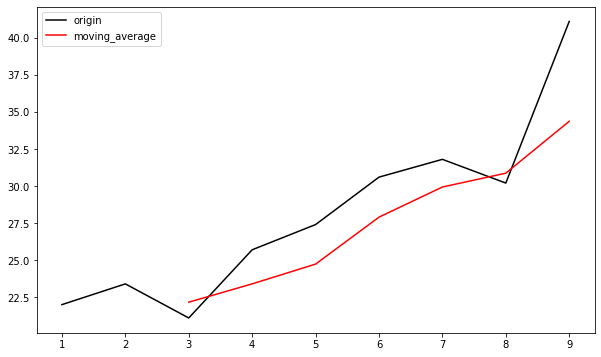

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data.index, data.price, color='k', label='origin')
plt.plot(moving_average.index, moving_average, color='red', label='moving_average')
plt.legend()
plt.show()

- 실패요인 : ARIMA(0,0,3) 모형

ARIMA(0,0,3)으로 모형을 구축해서 predict를 하는 문제인줄 알음

복잡하게 생각할 것이 없었다..

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
model=ARIMA(data.price, order=(0,0,3))
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                    9
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 -26.403
Date:                Wed, 16 Nov 2022   AIC                             62.806
Time:                        09:33:12   BIC                             63.792
Sample:                             0   HQIC                            60.678
                                  - 9                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2738      5.848      5.006      0.000      17.813      40.735
ma.L1          0.7167    211.207      0.003      0.997    -413.241     414.674
ma.L2          0.4211     57.895      0.007      0.994    -113.051     113.893
ma.L3          0.7016    149.313      0.005      0.996    -291.946     293.349
sigma2        15.7893   3324.643      0.005      0.996   -6500.391    6531.970
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.93   Prob(JB):                         0.39
Heteroskedasticity (H):               2.37   Skew:                             1.05
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

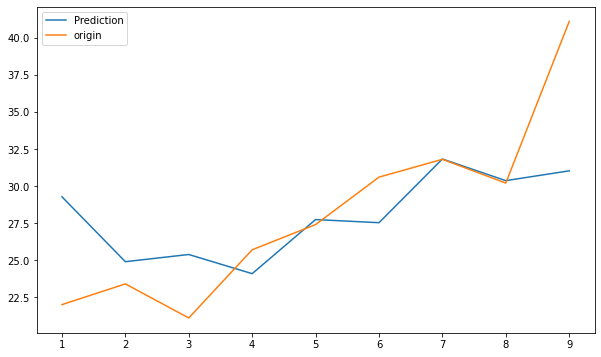

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(res.predict(), label='Prediction') #예측값
plt.plot(data.price, label='origin') #원래
plt.legend()
# plt.xticks([0,1,2,3,4,5,6,7,8], labels=[1,2,3,4,5,6,7,8,9])
plt.show()

(2) 1월 대비 9월 은 가격이 몇 %올랐는지? (소수점 2자리 반올림)

방법 1 : (최종수치/최초수치-1)*100

방법 2 : ((최종수치-최초수치)/최초수치)*100

In [99]:
f'{round(((41.1-22.0)/22.0)*100, 2)}%'

'86.82%'